**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import rcParams
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

**Import datasets**

In [2]:
df=pd.read_csv('/content/drive/MyDrive/new_project/ad.csv')
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


**Data Preprocessing**

In [3]:
df.shape

(402005, 12)

In [4]:
df=df.head(50000)

**Data Type of all columns**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   public_reference       50000 non-null  int64  
 1   mileage                49989 non-null  float64
 2   reg_code               46063 non-null  object 
 3   standard_colour        49344 non-null  object 
 4   standard_make          50000 non-null  object 
 5   standard_model         50000 non-null  object 
 6   vehicle_condition      50000 non-null  object 
 7   year_of_registration   45886 non-null  float64
 8   price                  50000 non-null  int64  
 9   body_type              49903 non-null  object 
 10  crossover_car_and_van  50000 non-null  bool   
 11  fuel_type              49932 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 4.2+ MB


**Summary statistics of data**

In [6]:
df.describe()

,public_reference,mileage,year_of_registration,price
count,5.000000e+04,49989.000000,45886.000000,5.000000e+04
mean,2.020071e+14,37711.973454,2015.064529,1.721039e+04
std,1.616532e+10,34764.991789,4.331270,2.284495e+04
min,2.015062e+14,0.000000,1933.000000,2.500000e+02
25%,2.020090e+14,10462.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28785.000000,2016.000000,1.270000e+04
75%,2.020102e+14,56655.000000,2018.000000,2.013850e+04
max,2.020110e+14,999999.000000,2020.000000,1.590000e+06


**Check The missing values in the dataset**

In [7]:
df.isnull().sum()

public_reference            0
mileage                    11
reg_code                 3937
standard_colour           656
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration     4114
price                       0
body_type                  97
crossover_car_and_van       0
fuel_type                  68
dtype: int64

**Fill the missing values of the dataset**

In [8]:
df.interpolate(method ='linear', limit_direction ='forward',inplace=True)
df["year_of_registration"].fillna( method ='bfill', limit = 1, inplace = True)

In [9]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

**Print the missing values of the dataset again**

In [10]:
print(df.isnull().sum())

public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64


**Create New Features**

In [11]:
current_year=2022
df['ageOfCar']=(current_year-df['year_of_registration'])

# **Data Analysis and Visualziation**

**Bar-plot**

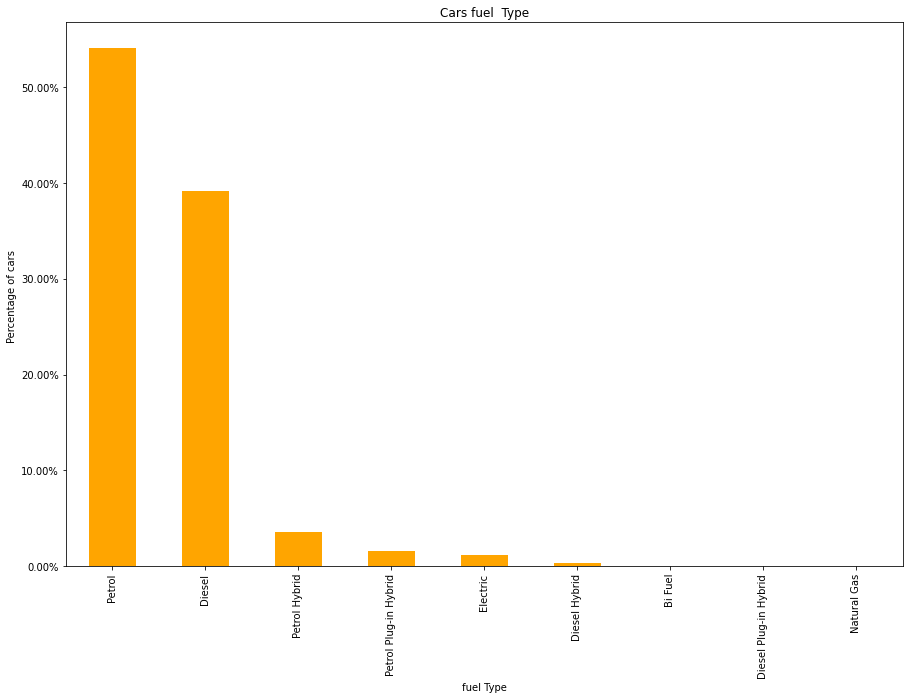

In [12]:
plt.figure(figsize=(15,10))
ax = df['fuel_type'].value_counts(normalize = True).plot(kind='bar', color = 'orange')
plt.title('Cars fuel  Type')
plt.xlabel('fuel Type')
plt.ylabel('Percentage of cars ')
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.show()

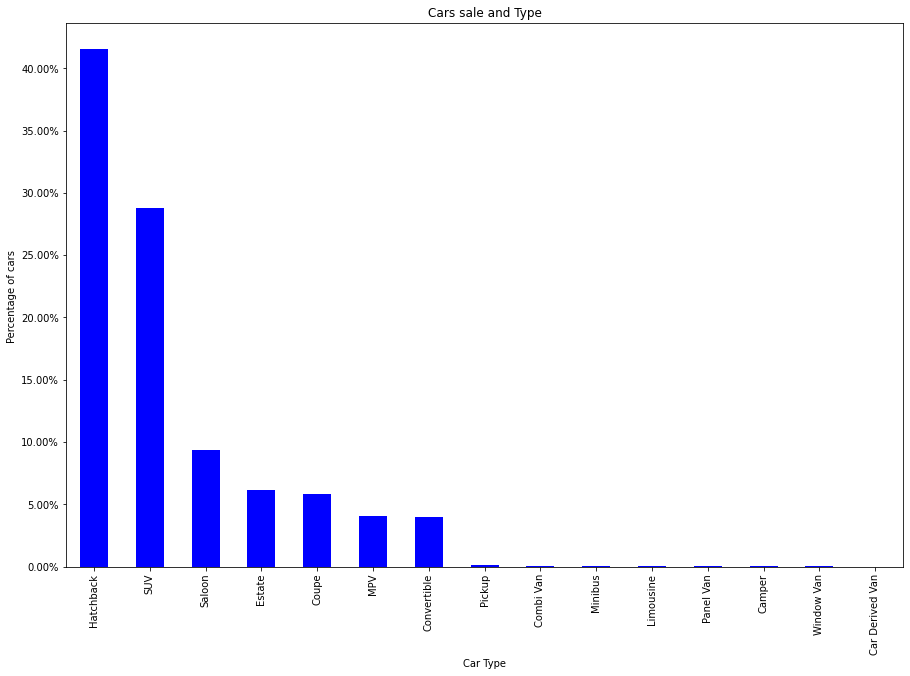

In [13]:
plt.figure(figsize=(15,10))
ax = df['body_type'].value_counts(normalize = True).plot(kind='bar', color = 'blue')
plt.title('Cars sale and Type')
plt.xlabel('Car Type')
plt.ylabel('Percentage of cars ')
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.show()

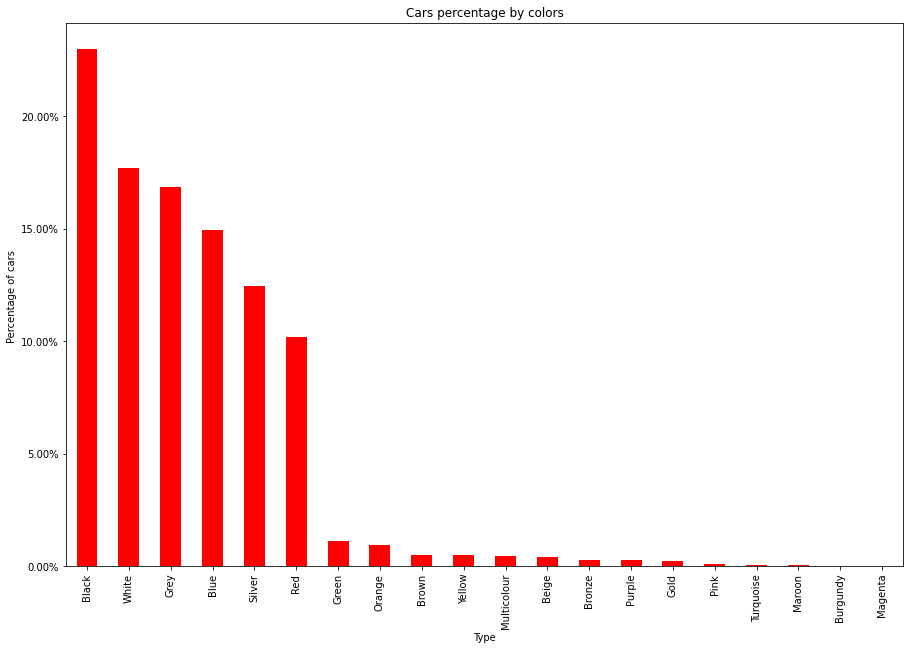

In [14]:

plt.figure(figsize=(15,10))
ax = df['standard_colour'].value_counts(normalize = True).plot(kind='bar', color = 'red')
plt.title('Cars percentage by colors')
plt.xlabel('Type')
plt.ylabel('Percentage of cars ')
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.show()

**Scatter-plot**

Text(0.5, 20.799999999999983, 'Miles')

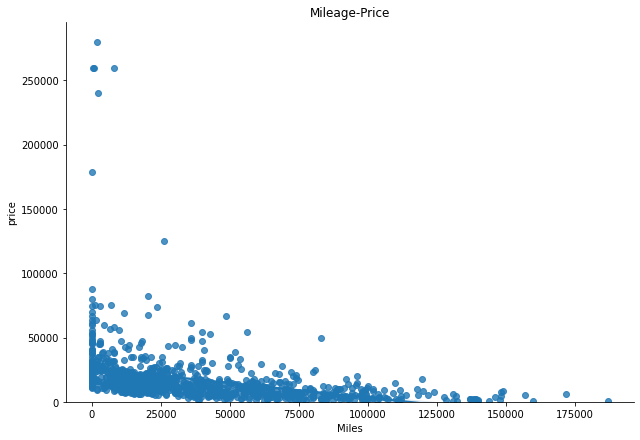

In [15]:
sample = df.sample(n = 1000)
sns.lmplot('mileage', 'price', data=sample[['mileage','price']],height = 6, aspect = 1.5)
plt.ylim(0, None);
plt.title('Mileage-Price')
plt.xlabel('Miles')

Text(0.5, 1.0, 'Year of registration - Price')

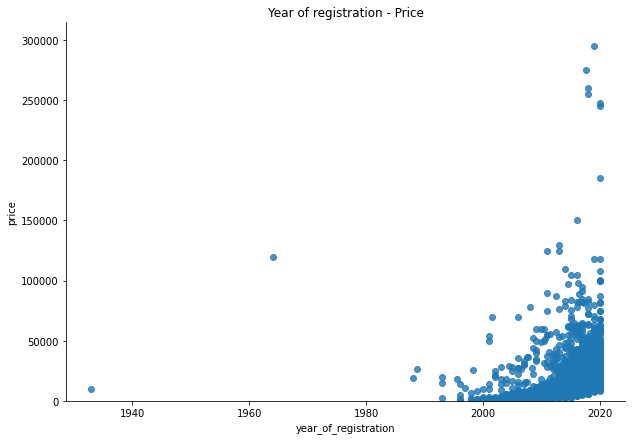

In [16]:
sample = df.sample(n = 4000)
sns.lmplot('year_of_registration', 'price', data=sample[['price','year_of_registration']],height = 6, aspect = 1.5)
plt.ylim(0, None);
plt.title('Year of registration - Price')

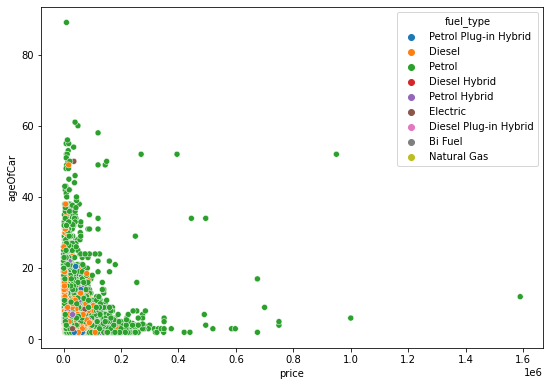

In [17]:


# figure size in inches
rcParams['figure.figsize'] = 9,6.27
sns.scatterplot(data = df , x ='price',y = 'ageOfCar',hue ='fuel_type')

**Unstack barplot**

Text(0.5, 1.0, 'Number of cars by Car-type and fuel type')

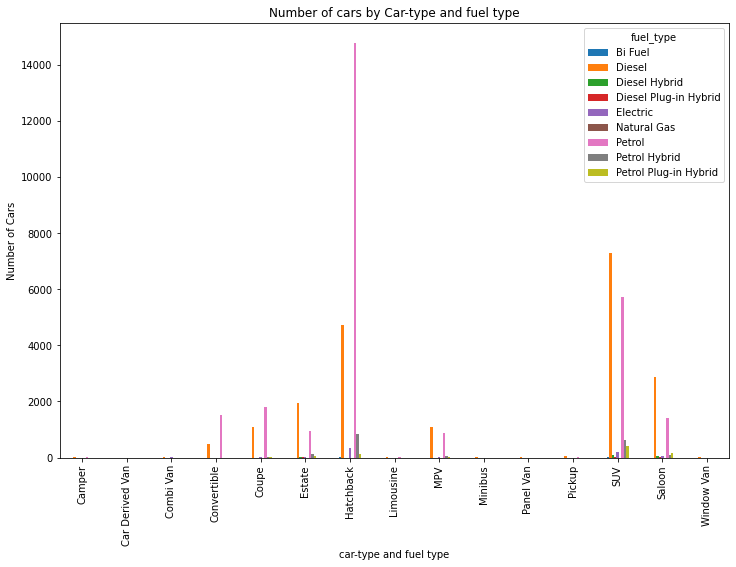

In [18]:
# standard_model
ax = df.groupby(['body_type', 'fuel_type']).price.count().unstack().plot(kind = 'bar',figsize = (12,8) )
plt.ylabel("Number of Cars")
plt.xlabel("car-type and fuel type")
plt.title('Number of cars by Car-type and fuel type')

Text(0.5, 1.0, 'Number of cars by Condition')

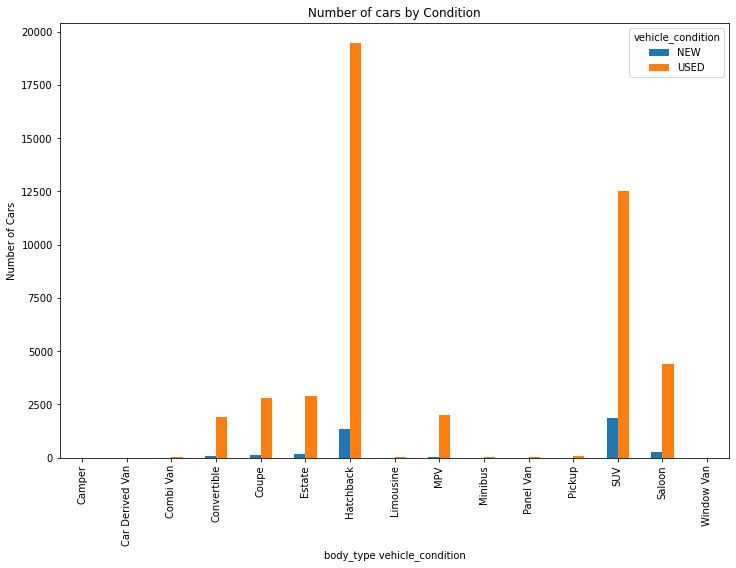

In [19]:
ax = df.groupby(['body_type', 'vehicle_condition']).price.count().unstack().plot(kind = 'bar',figsize = (12,8) )
plt.ylabel("Number of Cars")
plt.xlabel("body_type vehicle_condition")
plt.title('Number of cars by Condition')

**Box-plot**

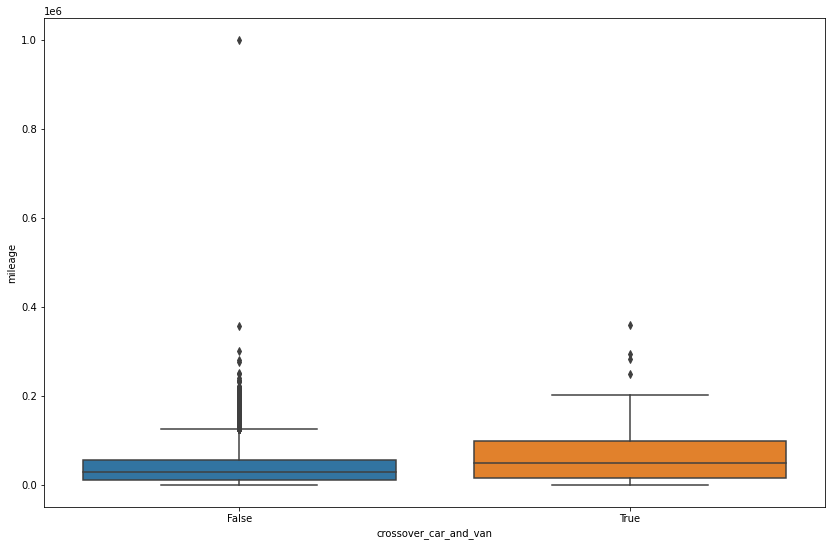

In [20]:
rcParams['figure.figsize'] = 14,9
sns.boxplot(data = df ,x='crossover_car_and_van',y='mileage')

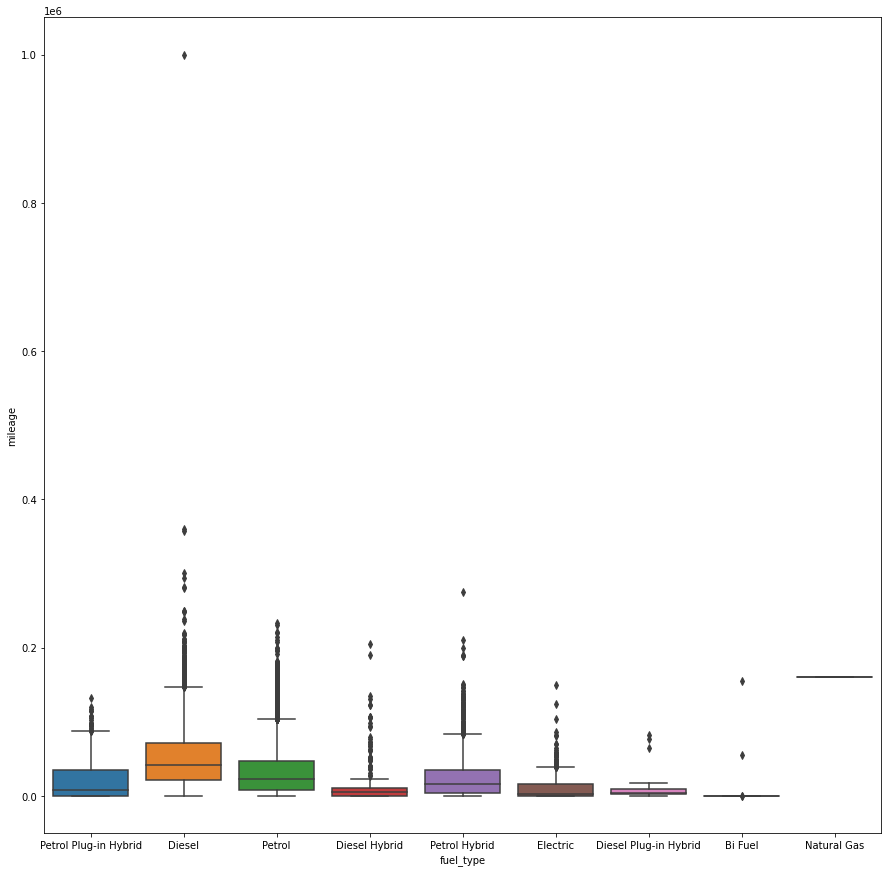

In [21]:
rcParams['figure.figsize'] = 15,15
sns.boxplot(data = df ,x='fuel_type',y='mileage')

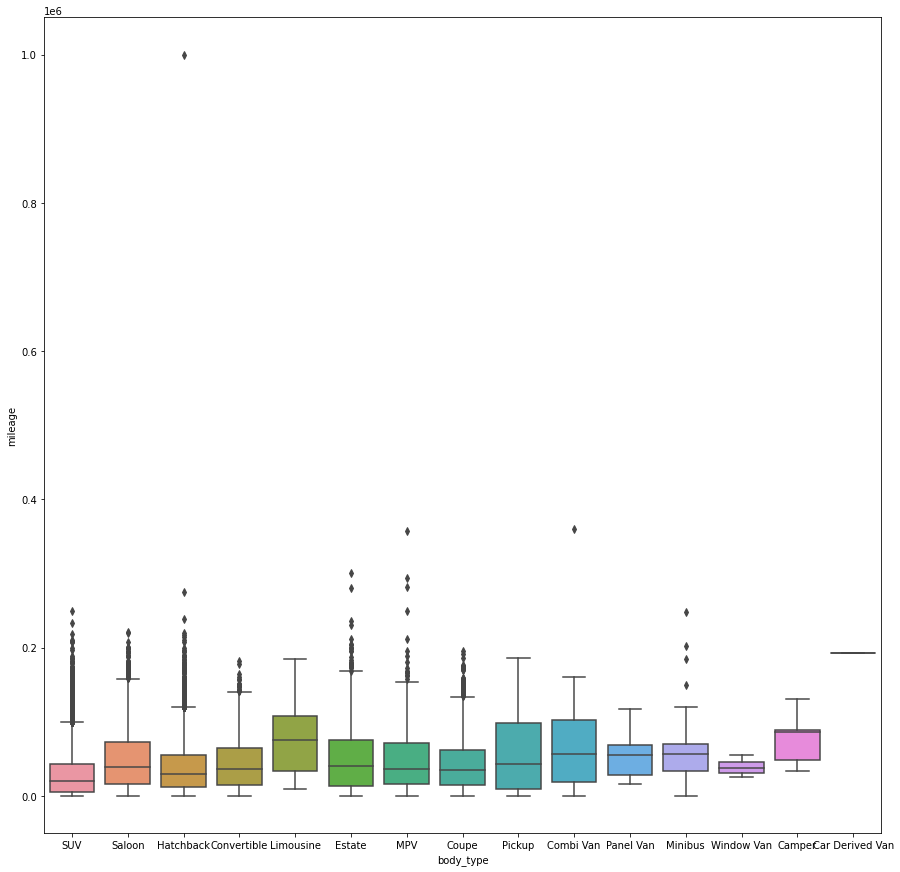

In [22]:
# figure size in inches
rcParams['figure.figsize'] = 15,15
sns.boxplot(data = df ,x='body_type',y='mileage')

**Pie-chart**

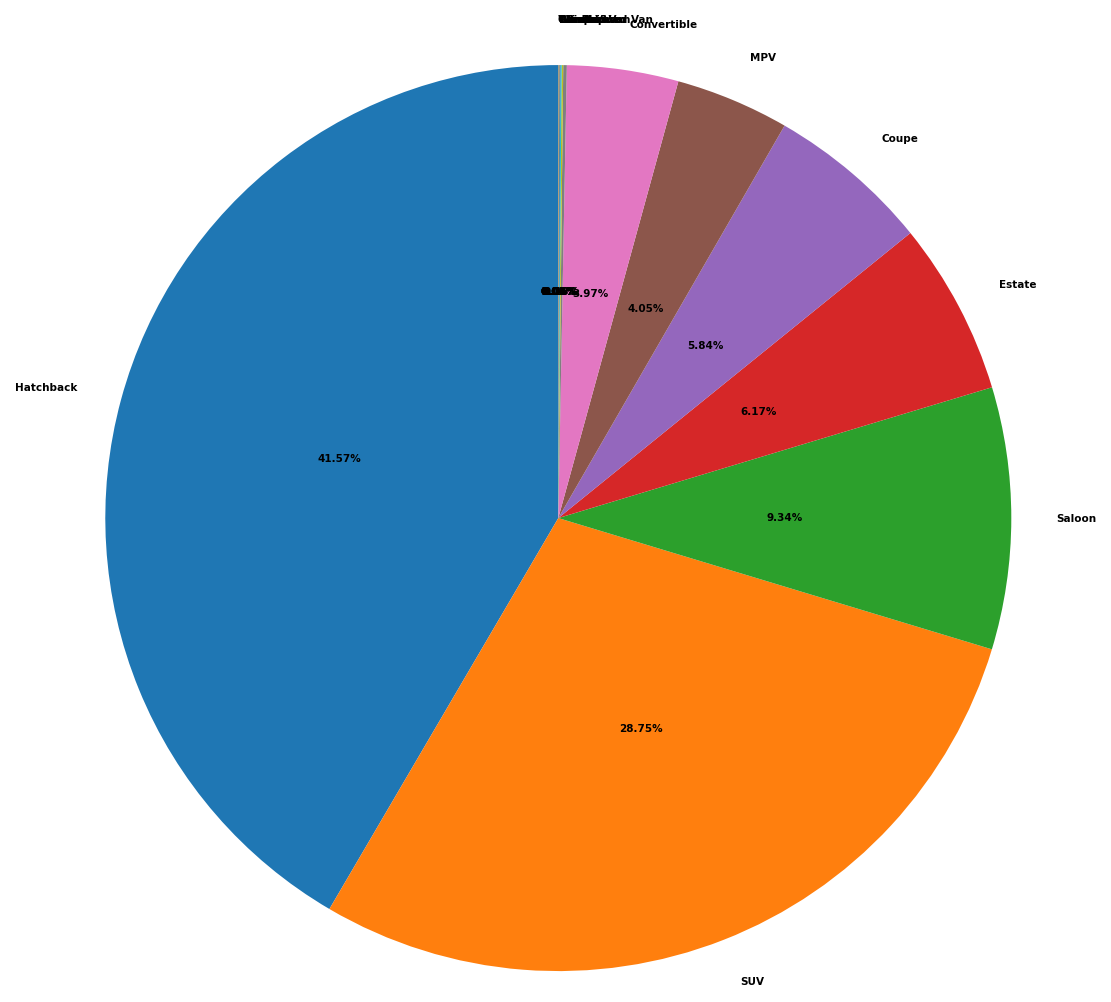

In [23]:
Oc_count = df['body_type'].value_counts().tolist()
Oc_label = df['body_type'].value_counts().index
plt.figure(figsize = (8,5),dpi = 150)
plt.pie(Oc_count , labels = Oc_label , autopct = '%1.2f%%',textprops={'fontweight':'bold','size' :5},startangle= 90,
       pctdistance = 0.5 , radius = 2)
plt.show()

# **Feature selection**

**Heat-map**

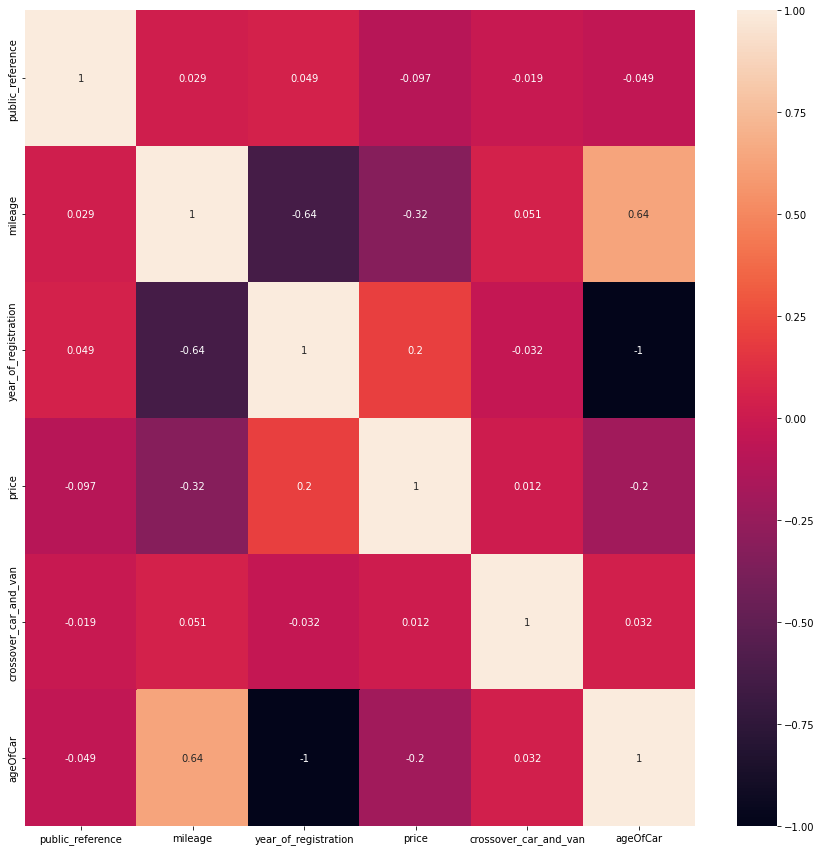

In [24]:
corr=df.corr()
sns.heatmap(corr,annot=True)

**Dependent and independent features**

In [25]:
x=df.drop('price',axis=1)
y=df['price']


In [26]:
x.drop(['reg_code','standard_colour','standard_make'],axis=1,inplace=True)

# **Feature engineering**
**Handle Categorical features**

In [27]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the df

x = dummies('fuel_type',x)
x = dummies('body_type',x)
x = dummies('standard_model',x)
x = dummies('vehicle_condition',x)

**SelectKBest class to extract best features**

In [28]:
#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print features importance

                Specs         Score
0    public_reference  1.710204e+10
1             mileage  8.290130e+08
4            ageOfCar  7.076039e+04
358               F40  4.999900e+04
757            Veyron  4.999900e+04
745                V8  4.999900e+04
360        F8 Tributo  4.999900e+04
75                356  4.999900e+04
815                Z8  4.999900e+04
134               917  4.999900e+04
628                S7  4.999900e+04
524         Navigator  4.999900e+04


**Train Test Split**

In [29]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test= train_test_split(x,y,test_size = 0.25, random_state = 100)

In [30]:
print("the shape of x_train",x_train.shape)
print("the shape of y_train",y_train.shape)
print("the shape of x_test",x_test.shape)
print("the shape of y_test",y_test.shape)

the shape of x_train (37500, 838)
the shape of y_train (37500,)
the shape of x_test (12500, 838)
the shape of y_test (12500,)


**Feature scaling**

In [31]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# **Machine Learning Models**

**Random Forest**

In [32]:

regressor = RandomForestRegressor(random_state=0)
regressor.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

**Prediction on unseen data**

In [33]:
# make prediction
y_pred = regressor.predict(x_test)

In [34]:
# Checking for Overfitting or Underfitting the data

print("Training set score: {:.4f}".format(regressor.score(x_train,y_train)))

print("validation set score: {:.4f}".format(regressor.score(x_test,y_test)))

Training set score: 0.9419
validation set score: 0.6810


**Evaluate Model Performance**

In [35]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared: {}'.format(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 2995.4172466920636
Mean Squared Error: 151503747.98599637
Root Mean Squared Error: 12308.685875673176
R-squared: 0.6810147119922754


**Actual vs Predicted plots**

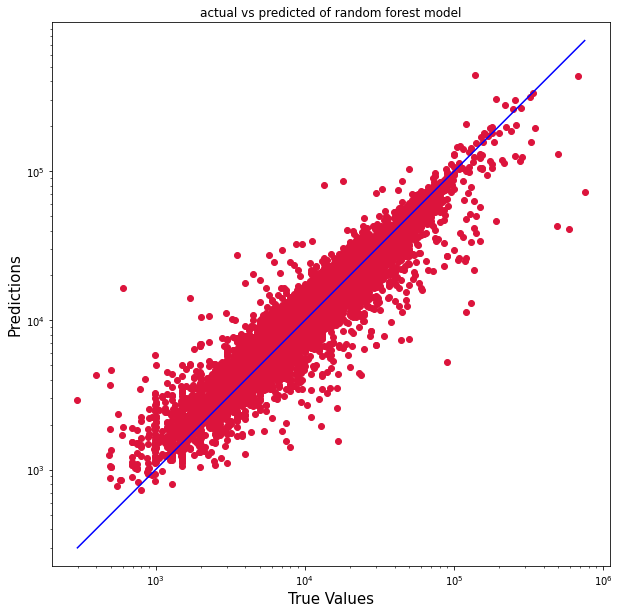

In [57]:



plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title("actual vs predicted of random forest model")
plt.axis('equal')
plt.show()

**Plots with Shap**

**Install and import SHAP module**

In [37]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 3.6 MB/s 


Below code take so much time approx(40-50 minutes) to run so i comment it so once you run all other code take the results of model then uncomment it and run the code

**Fits the SHAP explainer**

In [38]:
# # Fits the explainer
# explainer = shap.Explainer(regressor.predict, x_test)
# # Calculates the SHAP values - It takes some time
# shap_values = explainer(x_test)

Permutation explainer: 12501it [1:44:01,  2.00it/s]


**plot the shap values of Random Forest**

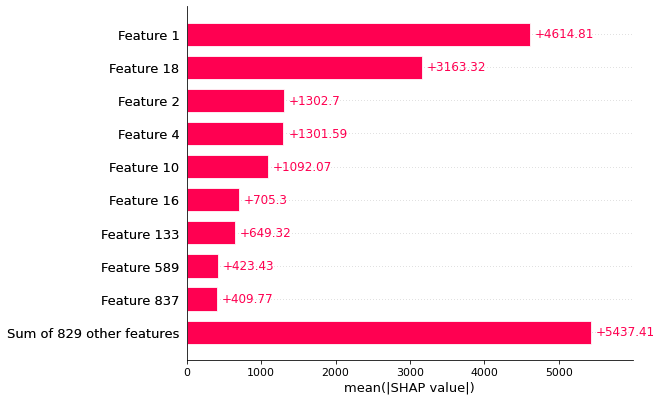

In [39]:
# shap.plots.bar(shap_values)

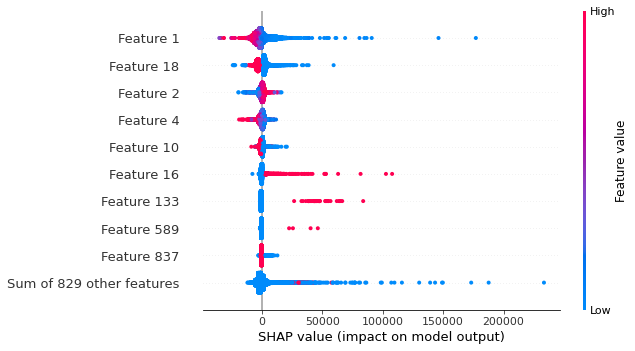

In [40]:
# shap.plots.beeswarm(shap_values)

**Gradient Boosted tree**

In [41]:
gradient_booster = GradientBoostingRegressor(learning_rate=0.1)

In [42]:
gradient_booster.fit(x_train,y_train)

GradientBoostingRegressor()

**Prediction on unseen data**

In [43]:
# make prediction
y_pred_1 = gradient_booster.predict(x_test)

In [44]:
# Checking for Overfitting or Underfitting the data

print("Training set score: {:.4f}".format(gradient_booster.score(x_train,y_train)))

print("validation set score: {:.4f}".format(gradient_booster.score(x_test,y_test)))

Training set score: 0.7464
validation set score: 0.5472


**Evaluate the model performance**

In [45]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred_1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_1)))
print('R-squared: {}'.format(metrics.r2_score(y_test, y_pred_1)))

Mean Absolute Error: 6398.862109887474
Mean Squared Error: 215075161.7511464
Root Mean Squared Error: 14665.44106909664
R-squared: 0.5471675564036957


**Actual vs predicted**

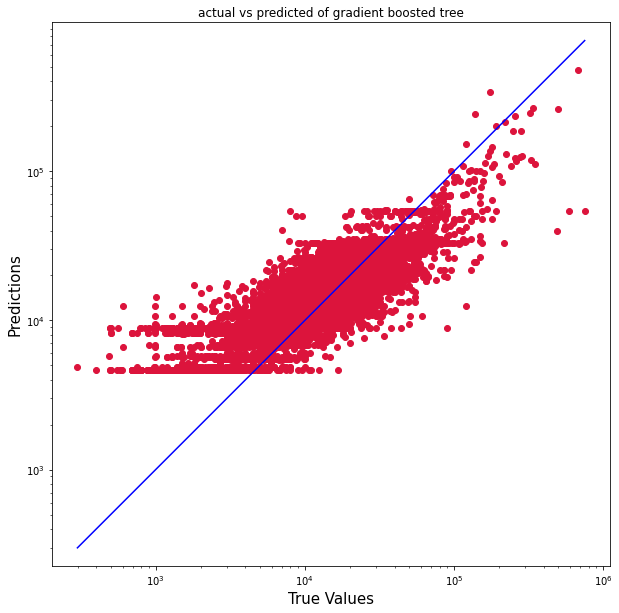

In [58]:

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_1, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_1), max(y_test))
p2 = min(min(y_pred_1), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title("actual vs predicted of gradient boosted tree")
plt.axis('equal')
plt.show()

**Plot with SHAP**

**Fits the explainer**

Below code take so much time approx(40-50 minutes) to run so i comment it so once you run all other code take the results of model then uncomment it and run the code

In [47]:
# # Fits the explainer
# explainer = shap.Explainer(gradient_booster.predict, x_test)
# # Calculates the SHAP values - It takes some time
# shap_values_1 = explainer(x_test)

Permutation explainer: 12501it [35:21,  5.87it/s]


**plot the shap values of gradient boosted tree**

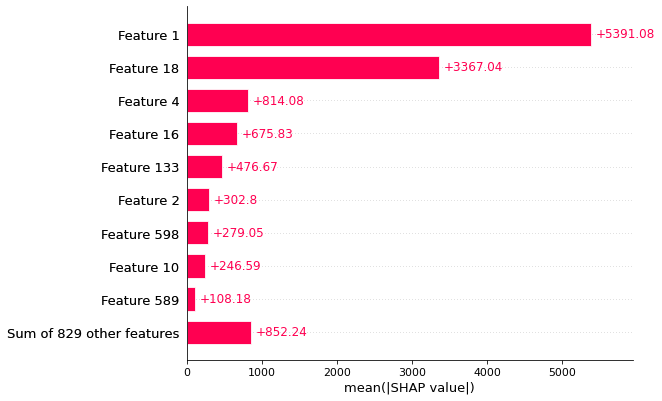

In [48]:
# shap.plots.bar(shap_values_1)

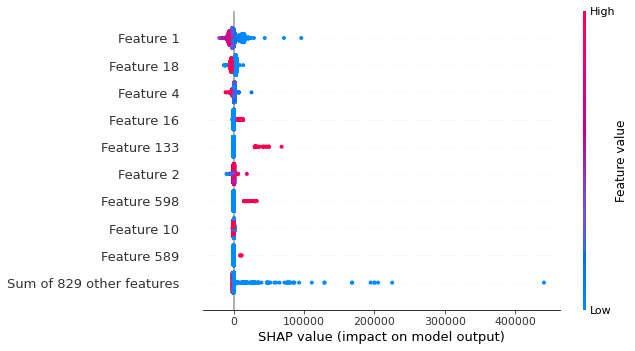

In [49]:
# shap.plots.beeswarm(shap_values_1)

**Multiple Linear Regression with interactions**

In [50]:

lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred_2=lr.predict(x_test)

In [51]:
# Compute model slope and intercept

a = lr.coef_
b = lr.intercept_,
print("Estimated model slope, a:" , a)
print("Estimated model intercept, b:" , b)

Estimated model slope, a: [-1.64273584e+02 -3.33844911e+03 -3.97127026e+16 -2.72975735e+02
 -3.97127026e+16  1.25492174e+03  5.84492950e+02  2.81934936e+02
  1.25787335e+03 -4.86705613e+15  1.88979515e+03  1.06276669e+03
  1.34404209e+03 -1.45193735e+15 -3.42398927e+02 -3.60073765e+02
 -5.17887247e+02 -9.27664690e+02 -2.23187880e+03 -2.39424147e+02
 -1.42360205e+03 -1.17871375e+02 -1.98622130e+02 -3.56561989e+02
 -3.75760803e+03 -1.57888521e+03 -2.38141457e+01  3.09598253e+15
  1.91406421e+02 -9.82052747e+14 -2.14584867e+02 -7.55312772e+02
  2.41713882e+02 -8.97500000e+01  5.24000000e+02  2.47500000e+01
  8.17500000e+01  7.37500000e+00  1.85000000e+01  9.47500000e+01
  9.07500000e+01  1.51250000e+02 -3.62500000e+01  5.55000000e+01
  1.10875000e+02  1.33000000e+02  3.68125000e+01  1.16250000e+02
 -1.44000000e+02  2.16750000e+02  4.00000000e+00 -2.98750000e+01
 -5.12500000e+00 -9.45000000e+01 -1.02500000e+02 -5.66923828e+01
 -7.03000000e+02  9.37500000e+01 -1.87500000e+00  2.97906626e+15

**Evaluate the model Performance**

In [52]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred_2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_2)))
print('R-squared: {}'.format(metrics.r2_score(y_test, y_pred_2)))

Mean Absolute Error: 945051057010097.5
Mean Squared Error: 5.351826541994321e+32
Root Mean Squared Error: 2.313401509032602e+16
R-squared: -1.1268064015308964e+24


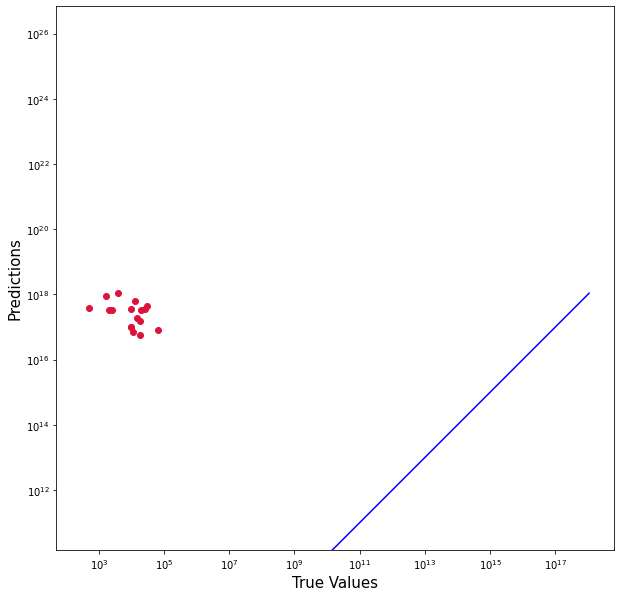

In [53]:

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_2, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_2), max(y_test))
p2 = min(min(y_pred_2), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Below code take so much time approx(40-50 minutes) to run so i comment it so once you run all other code take the results of model then uncomment it and run the code.

In [54]:
# # Fits the explainer
# explainer = shap.Explainer(lr.predict, x_test)
# # Calculates the SHAP values - It takes some time
# shap_values_2 = explainer(x_test)

Permutation explainer: 12501it [42:12,  4.92it/s]


**plot the shap values of Linear Regression**

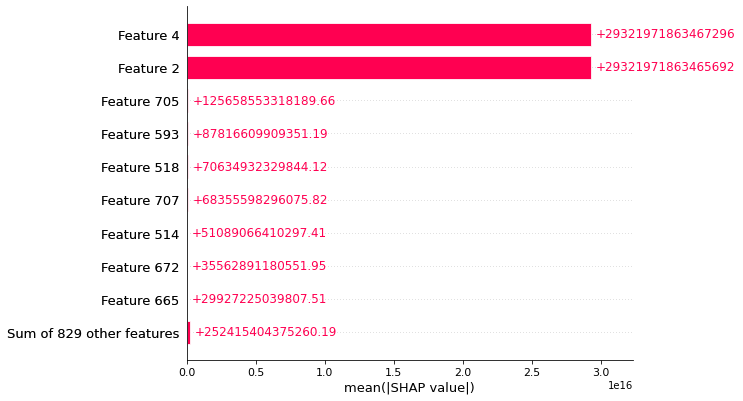

In [55]:
# shap.plots.bar(shap_values_2)

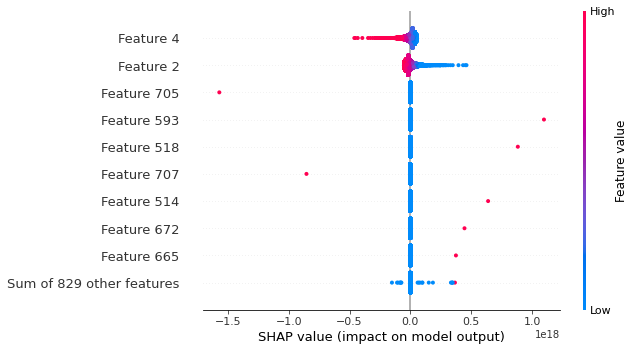

In [56]:
# shap.plots.beeswarm(shap_values_2)